# SRD  praca domowa 1

<b> Termin oddania: 04.02.2021</b>

Rozwiązane zadania można wysyłać w 2 formatach. Albo jako skrypt Julii, Pythona lub R  z komentarzami określającymi numer rozwiązywanego zadania i odpowiedziami na zadane pytania, albo jako uzupełniony notatnik z poleceniami (format <tt>.ipynb</tt>) razem z wygenerowanym na jego podstawie plikiem <tt>.html</tt>. Można to zrobić drogą mailową wysyłając plik lub pliki na adres [bpankra@sgh.waw.pl](mailto:bpankra@sgh.waw.pl)

## Zad 1 

Ze strony <https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)> Pobierz zbiór <tt>GermanCredit</tt>  opisujący scoring kredytowy osób ubiegających się o kredyt. Celem zadania jest zaproponowanie odpowiedniego klasyfikatora pozwalającego na wyróżnienie złych i dobrych kredytów (zmienna <tt>Class</tt> w omawianym zbiorze). 



<b>1.</b>   Przygotuj zbiór do dalszej analizy. (Nie normalizuj zmiennych, pamiętaj jedynie o odpowiednim zakodowaniu zmiennych jakościowych - zarówno objaśnianej jak i objaśniających) <b>(2 p.) </b>

<b>2.</b> Na przygotowanych danych oszacuj model regresji logistycznej - pamiętaj o podziale zbioru na zbiór trenujący i testowy. <b>(1 p.) </b>

<b>3.</b> Dla zadanego z góry progu odcięcia ($0.5$) wyznacz trafność predykcji modelu. <b> (1 p.) </b>

<b>4.</b> Czy w przypadku oceny ryzyka kredytowego trafność jest odpowiednią miarą? Jeżeli nie zaproponuj inną i podaj jej wartość. Odpowiedź uzasadnij. <b> (2 p.) </b>

<b>6.</b> Napisz funkcję, która zoptymalizuje próg odcięcia w zależności od  miesięcznej stopy oprocentowania $r$ (niech będzie ona parametrem wejściowym funkcji). Dla uproszczenia przyjmij, że:
- zysk z udzielenia jednego dobrego kredytu jest równy: <tt>r \* avg_duration * avg_amount</tt>, gdzie <tt>avg_duration</tt> oznacza przeciętną długość trwania kredytu a <tt>avg_amount</tt> jego przeciętną wielkość w zadanym zbiorze.

- gdy bank nie udzieli  kredytu (źle zaklasyfikuje dobrego kredytobiorcę lub poprawnie niedobrego) nie traci ani nie zyskuje - jego wypłata jest równa 0.

- strata wynikła z udzielenia złego kretytu jest równa $\dfrac{1}{4}$ przeciętnej jego wielkości: <tt>0.25 \* avg_duration </tt> - przyjmijmy, że  bank jest w stanie odzyskać tylko $\dfrac{3}{4}$ pożyczonej kwoty.
<b> (3 p.) </b>

<b>7.</b> Jaki jest próg odcięcia przy założeniu, że $r = 5\%$? Jaka jest dla tego progu wartość $F_1$-score'u? <b> (1 p.) </b>

In [107]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

In [66]:
SEED = 42

## Zadanie 1

In [43]:
# data = pd.read_csv('../data/data_slm/german.data', header=None, sep=' ')
data = pd.read_csv('../data/data_slm/german.data', header=None, sep=' ')

In [44]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [51]:
X = data.iloc[:, 1:20]
y = data[20]

In [62]:
X = pd.get_dummies(X)
y = y.apply(lambda x: 0 if x == 1 else 1)

## Zadanie 2

In [88]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=SEED)

In [89]:
clf = LogisticRegression(random_state=SEED, max_iter=1000).fit(X_train, y_train);

## Zadanie 3

In [90]:
print('Logistic regression accuracy score is %.3f' % accuracy_score(y_holdout, clf.predict(X_holdout)))

Logistic regression accuracy score is 0.733


## Zadanie 4

Uważam, że w przypadku oceny ryzyka kredytowego trafność nie jest odpowiednią miarą. Lepiej używać ROC AOC score, bo *illustrates the performance of a binary classifier system as its discrimination threshold is varied.*

In [95]:
print('Logistic regression ROC AUC score is %.3f' % roc_auc_score(y_holdout, clf.predict(X_holdout)))

Logistic regression ROC AUC score is 0.616


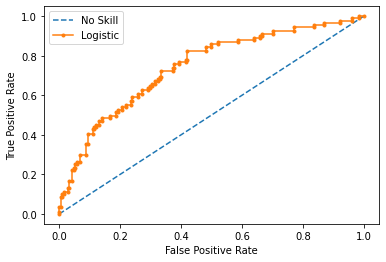

In [118]:
probas = clf.predict_proba(X_holdout)[:, 1]
fpr, tpr, thresholds = roc_curve(y_holdout, probas)
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Można też użyć F1-score, bo dla banka jest ważne nie tylko nie udzielić kredytu konsumentowi, który nie wyplaci, ale też nie odmówić temu, ktory może wyplacić. 

In [106]:
print('Logistic regression F1-score is %.3f' % f1_score(y_holdout, clf.predict(X_holdout)))

Logistic regression F1-score is 0.420


## Zadanie 5

In [191]:
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=0.273450, G-Mean=0.695


In [204]:
avg_duration = X_train[1].mean()
avg_amount = X_train[4].mean()

In [258]:
new_df = pd.DataFrame(columns=['tn', 'fp', 'fn', 'tp', 'profit'])
for threshold in thresholds:
    new_preds = np.where(clf.predict_proba(X_holdout)[:,1] > threshold, 1, 0)
    tn, fp, fn, tp = confusion_matrix(y_holdout, new_preds).ravel()
    

In [264]:
new_df

,tn,fp,fn,tp,profit
0,1,2,3,4,5


In [263]:
new_df['tn', 'fp', 'fn', 'tp', 'profit']= [1, 2, 3, 4, 5]

ValueError: Length of values (5) does not match length of index (1)

In [250]:
new_preds = np.where(clf.predict_proba(X_holdout)[:,1] > 0.4, 1, 0)
tn, fp, fn, tp = confusion_matrix(y_holdout, new_preds).ravel()
tn, fp, fn, tp

(176, 33, 47, 44)

In [251]:
new_preds = np.where(clf.predict_proba(X_holdout)[:,1] > 0.3, 1, 0)
tn, fp, fn, tp = confusion_matrix(y_holdout, new_preds).ravel()
tn, fp, fn, tp

(145, 64, 31, 60)

In [252]:
new_preds = np.where(clf.predict_proba(X_holdout)[:,1] > 0.2, 1, 0)
tn, fp, fn, tp = confusion_matrix(y_holdout, new_preds).ravel()
tn, fp, fn, tp

(108, 101, 16, 75)